#**Auto Diff/ Auto Grad**

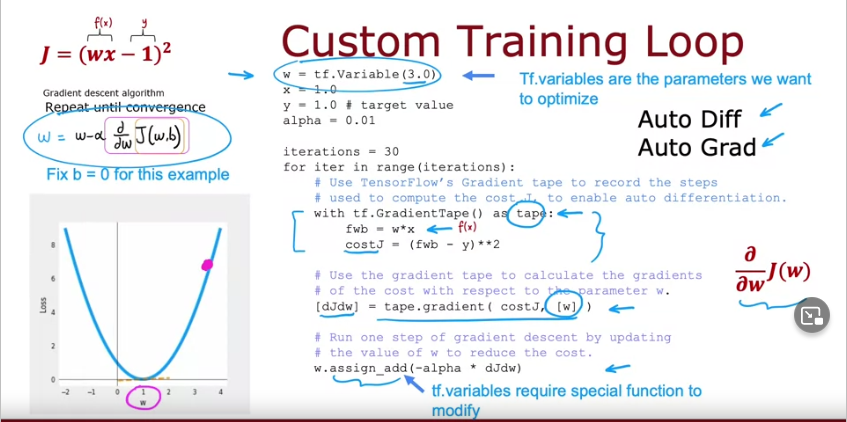

#Custom training loop

In [ ]:
import tensorflow as tf

w = tf.Variable(3.0)
x = 1.0
y = 1.0 #Target Value
alpha = 0.01
iterations = 30
for iter in range(iterations):
  #Use Tensorflow's Gradient tape to record the tape
  #Used to compute the cost J to enable auto differentiation
  with tf.GradientTape() as tape:
    fwb = w*x
    costJ = (fwb-y)**2
  
  #Use the gradient tape to calculate the gradients of the cost with respect to the parameter 'w'.
  [dJdw] = tape.gradient(costJ, [w])

  #Run one step of the gradient descent by updating the values of 'w' to reduce the cost.

  w.assign_add(-alpha * dJdw) # .assign_add() method was used instead of traditional equation writing because tf.Variable requires this special function to modify

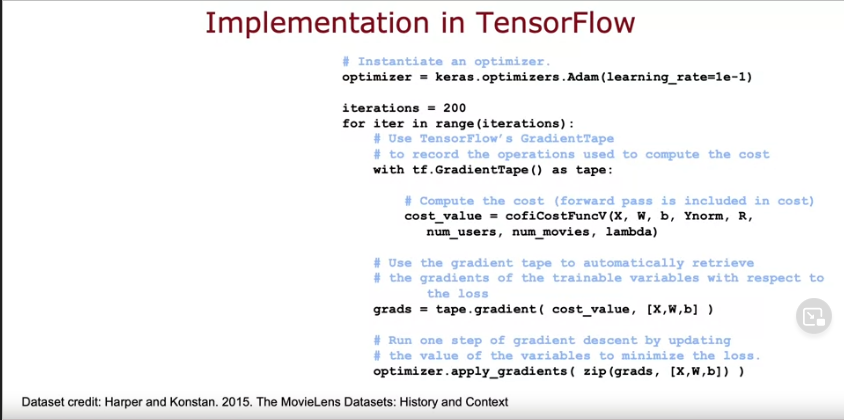

#Implementation in TensorFlow

In [ ]:
import tensorflow as tf
import keras

optimizer = keras.optimizers.Adam(learning_rate = 1e-1)
iterations = 200

for iter in range(iterations):
  #Use Tensorflow's Gradient tape to record the operations to compute the cost
  with tf.GradientTape() as tape:
    #Compute the cost(Forward pass is included in the cost)

    cost_value = cofiCostFuncV(X,W,b, Ynorm, R, num_users, num_movies, lambda)
  
  #Use the gradient tape to automatically retrieve the gradients of the trainable variables with respect to the loss.
  grads = tape.gradient(cost_value, [X,W,b])

  #Run one step of the gradient descent by updating the values of the variables to minimize the loss.

  optimizer.apply_gradients(zip(grads,[X,W,b]))

SyntaxError: ignored

#**TensorFlow implementation of content-based filtering**

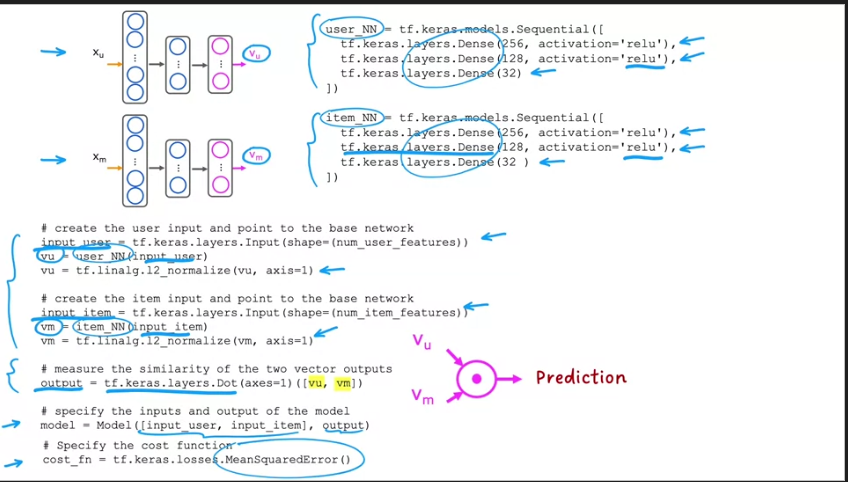

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dot
from tensorflow.keras.activations import relu
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.linalg import l2_normalize

**Creating separate neural networks**

In [4]:
#User Neural Networks

user_NN = Sequential([
    Dense(256, activation = relu),
    Dense(128, activation = relu),
    Dense(32)])

#Item Neural Networks

item_NN = Sequential([
    Dense(256, activation = relu),
    Dense(128, activation = relu),
    Dense(32)])

**Normalizing the values**

In [ ]:
#Create the user input and point to the base network

input_user = Input(shape=(num_user_features))
vu = user_NN(input_user)
vu = l2_normalize(vu, axis = 1) #making sure the output is 1 columed

#Create the item input and point to the base network

input_item = Input(shape=(num_item_features))
vi = item_NN(input_user)
vi = l2_normalize(vi, axis = 1) #making sure the output is 1 columed

**Measure the similiarity of the two vector outputs**

In [ ]:
output = Dot(axes = 1)([vu,vm])

**Specify the inputs and output of the model**

In [ ]:
model = Model([input_user,input_item],output)

**Specify the cost function**

In [ ]:
cost_fn = MeanSquaredError()